https://colab.research.google.com/github/anangazmi/laskarai_proyekanalisisdata/blob/main/notebook.ipynb

# **Proyek Analisis Data**: [E-Commerce Public Dataset]
- **Nama:** [Azmi irfala]
- **Email:** [azmiho9977@gmail.com]
- **ID Dicoding:** [azmi9977]

## **Menentukan Pertanyaan Bisnis**

1. Produk apa saja yang banyak dibeli? (10 Produk Teratas)
2. Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
3. Dari kota atau negara bagian mana pesanan terbanyak berasal?
4. Berapa rata-rata waktu pengiriman untuk setiap kategori produk?
5. Bagaimana tingkat kepuasan pelanggan? Produk mana yang memiliki ulasan rating tertinggi dan terendah dari pelanggan?
6. Bagaimana tren performa penjualan?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **A. Gathering Data**



#### 1. Data Set Customer



In [2]:
customers_df = pd.read_csv("/content/ecommerce_data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### 2. Dataset Geografis

In [3]:
geografis_df = pd.read_csv("/content/ecommerce_data/geolocation_dataset.csv")
geografis_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### 3. Dataset Order

In [4]:
orders_df = pd.read_csv("/content/ecommerce_data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### 4. Dataset Order Items

In [5]:
orderItems_df = pd.read_csv("/content/ecommerce_data/order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### 5. Dataset Order Payments

In [6]:
orderPayments_df = pd.read_csv("/content/ecommerce_data/order_payments_dataset.csv")
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### 6. Dataset Order Reviews

In [7]:
orderReviews_df = pd.read_csv("/content/ecommerce_data/order_reviews_dataset.csv")
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### 7. Dataset Products

In [8]:
products_df = pd.read_csv("/content/ecommerce_data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### 8.   Dataset Product Category


In [9]:
productCategory_df = pd.read_csv("/content/ecommerce_data/product_category_name_translation.csv")
productCategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### 9. Dataset Seller

In [10]:
sellers_df = pd.read_csv("/content/ecommerce_data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### **Insight:**
* 9 Dataset Digunakan: Data pelanggan, geografis, pesanan, item pesanan, pembayaran, ulasan, produk, kategori produk, dan penjual.

* Data Relatif Bersih: Tidak ada missing values atau duplikasi pada dataset utama seperti customers_dataset.csv.

* Integrasi Mudah: Dataset saling terhubung melalui kolom kunci seperti customer_id, order_id, dan product_id.

* Potensi Analisis: Bisa menjawab pertanyaan bisnis seperti produk terlaris, metode pembayaran favorit, dan kepuasan pelanggan.

### **B. Assessing Data**

#### 1. Menilai Data Customer

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [13]:
customers_df.duplicated().sum()

0

In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### 2. Menilai Dataset Geografis

In [15]:
geografis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geografis_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [17]:
print("Jumlah Duplikat: ", geografis_df.duplicated().sum())

Jumlah Duplikat:  261831


In [18]:
geografis_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### 3. Menilai Dataset Orders

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [21]:
orders_df.duplicated().sum()

0

In [22]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 4. Menilai Dataset Order Items

In [23]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
orderItems_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [25]:
orderItems_df.duplicated().sum()

0

In [26]:
orderItems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### 5. Menilai Dataset Order Payments

In [27]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
orderPayments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [29]:
orderPayments_df.duplicated().sum()

0

In [30]:
orderPayments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### 6. Menilai Dataset Order Reviews

In [31]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
orderReviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [33]:
orderReviews_df.duplicated().sum()

0

In [34]:
orderReviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### 7. Menilai Dataset Products

In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [37]:
products_df.duplicated().sum()

0

In [38]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### 8. Menilai Dataset Products Category

In [39]:
productCategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
productCategory_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [41]:
productCategory_df.duplicated().sum()

0

In [42]:
productCategory_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### 9. Menilai Dataset Sellers

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [45]:
sellers_df.duplicated().sum()

0

In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### **Insight:**
- Data Lengkap: Tidak ada missing values atau duplikasi pada dataset utama seperti customers_dataset.csv.

- Struktur Jelas: Tipe data kolom sesuai (contoh: customer_id sebagai string, customer_zip_code_prefix sebagai integer).

- Statistik Deskriptif: Kode pos pelanggan bervariasi dari 1003 hingga 99990, rata-rata 35137.

- Kualitas Baik: Data konsisten dan siap untuk analisis lebih lanjut.

### **C. Cleaning Data**

#### 1. Mengubah tipe data object
menjadi date pada kolom '`shipping_limit_date`'

In [47]:
# Menentukan daftar kolom yang perlu diubah menjadi datetime
datetime_columns = ["shipping_limit_date"]

# Mengonversi kolom dalam 'datetime_columns' ke format datetime untuk analisis waktu
for column in datetime_columns:
  orderItems_df[column] = pd.to_datetime(orderItems_df[column])

In [48]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### 2. Dataframe Orders
* Mengubah data pada Dataframe Orders yang memiliki missing values (null) menjadi non-null.
* Mengonversi tipe data objek menjadi datetime pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`.

In [49]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [50]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [51]:
# Menentukan daftar kolom yang perlu diubah menjadi datetime
datetime = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

# Mengonversi setiap kolom dalam daftar ke format datetime
for column in datetime:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [52]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [53]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


#### 3. Dataframe Order Reviews
*   Mengatasi missing values pada 'DataFrame order reviews' dengan mengisi nilai null agar tidak ada data yang kosong.
* Mengubah tipe data objek menjadi date pada kolom review_creation_date dan menjadi `timestamp` pada kolom `review_answer_timestamp`.



In [54]:
orderReviews_df[orderReviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [55]:
orderReviews_df[orderReviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [56]:
orderReviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [57]:
orderReviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [58]:
orderReviews_df.fillna(value="The customer didn't give a comment", inplace=True)

In [59]:
# Menentukan daftar kolom yang akan dikonversi ke datetime
datetime = ["review_creation_date", "review_answer_timestamp"]

# Mengonversi setiap kolom dalam daftar ke format datetime
for column in datetime:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [60]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### **Insight:**
- Ubah Tipe Data: Kolom tanggal di `orders_df` dan `orderReviews_df` perlu diubah dari object ke **datetime**.

- Handling Missing Values: Kolom seperti `review_comment_title` dan `review_comment_message` di `orderReviews_df` memiliki nilai null yang perlu ditangani.

- Cek Duplikasi: Perlu memeriksa dan menghapus duplikasi di dataset seperti `orders_df` dan `orderReviews_df`.

- Format Konsisten: Pastikan format data seragam, terutama untuk kolom teks dan tanggal.

- Gabungkan Data: Dataset seperti `orders_df` dan `orderReviews_df` bisa digabungkan untuk analisis lebih mendalam.

## **Exploratory Data Analysis (EDA)**

### 1. Explore Data Customers

In [61]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [62]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
46019,45360c874acf24110baf02fb5d2314d4,b703d83e085a6a8b339dc548f4878ca8,25070,duque de caxias,RJ
17752,477008aed7b2d717c7eb1cae190cc9c4,9419615f7054217056269d2acf70dac6,20510,rio de janeiro,RJ
15664,8eed04f8cc4675d5a3ab5ffc7b9c3d44,b22b660b766eee055f792b62d1f38cbc,24210,niteroi,RJ
31864,a9cec8d0f68e304ca6a977fe4726e4ac,d5b17926c20e098f4d47c3b9a0e3fde3,23575,rio de janeiro,RJ
68133,b27659c9bf30264f52e445e61bde1cf2,4ae7b4af14bc680cc816ec09b3a1e170,1211,sao paulo,SP


In [63]:
# Mengelompokkan data berdasarkan kota pelanggan dan menghitung jumlah pelanggan unik di setiap kota,
# kemudian mengurutkan hasilnya dari jumlah pelanggan terbanyak ke yang paling sedikit.
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [64]:
# Mengelompokkan data berdasarkan provinsi pelanggan dan menghitung jumlah pelanggan unik di setiap provinsi,
# kemudian mengurutkan hasilnya dari jumlah pelanggan terbanyak ke yang paling sedikit.
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### 2. Explore Data Geolocation

In [65]:
geografis_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [66]:
geografis_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [67]:
geografis_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
645100,38300,-18.971154,-49.463351,ituiutaba,MG
141295,5761,-23.635442,-46.767270,sao paulo,SP
610874,36090,-21.688318,-43.434863,juiz de fora,MG
598005,35500,-20.149193,-44.884433,divinopolis,MG
332765,14164,-21.124574,-47.992889,sertaozinho,SP


### 3. Explore Data Orders

In [68]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
67526,e66b6216dfb711466b7edd3d16861edb,fbf29fba017084f9a57312200a9aba57,delivered,2018-02-07 10:55:06,2018-02-08 07:50:01,2018-02-09 00:48:45,2018-02-18 16:39:19,2018-03-05
44697,2c8f8b620f20e83829e70d2e0f32e49a,35ac5b14022c7d3d8e5388bb52224abe,delivered,2017-12-17 13:36:40,2017-12-17 13:54:20,2017-12-26 19:45:38,2018-01-10 13:41:47,2018-01-12
34466,c8426a2c3cc5c11e8aa0789c3238d4d9,6b05139c22666edaab8363c643187ed1,delivered,2017-10-16 23:26:54,2017-10-16 23:49:08,2017-10-17 22:35:05,2017-10-24 17:33:30,2017-11-01
90973,a5942e5383d5308ba557c96df89cf1c4,920478d67ff9b1d45759b2dd1aa4d37f,delivered,2018-04-09 14:29:00,2018-04-09 14:50:35,2018-04-10 22:21:46,2018-04-18 21:06:36,2018-05-10
41208,7b87733793ed5fda5792b830c3d9c854,b25460803232046ec91c399070801d95,delivered,2018-05-01 20:11:15,2018-05-01 21:02:18,2018-05-03 13:49:00,2018-05-11 00:38:32,2018-05-30


In [69]:
# Mengonversi kolom 'order_purchase_timestamp' dan 'order_approved_at' ke format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

# Menghitung waktu pemrosesan pesanan sebagai selisih antara 'order_approved_at' dan 'order_purchase_timestamp'
orders_df['processing_time'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']

# Menampilkan hasil dengan kolom 'order_id', 'customer_id', dan 'processing_time'
print(orders_df[['order_id', 'customer_id', 'processing_time']])

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      processing_time  
0     0 days 00:10:42  
1     1 days 06:42:50  
2  

In [70]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time
94043,60e67382f21910dba1cafc875da0c1ee,be7b8905ffb39a2116e2fbcf8ecea2f8,delivered,2018-04-19 09:04:08,2018-04-19 09:15:10,2018-04-19 23:41:19,2018-04-21 00:32:51,2018-05-08,0 days 00:11:02
28129,97a475450ceb764b03982eeb9bfc10a8,3aacb368d6b1db2b137d99daf9b3a05a,delivered,2017-11-26 23:26:23,2017-11-26 23:38:28,2017-11-27 19:02:31,2017-12-07 16:06:01,2017-12-27,0 days 00:12:05
86678,4a98152d0c65138f9f701c576b24b7b7,79754884aaf13f155f4f64fc180b96a7,delivered,2018-03-20 00:33:02,2018-03-20 00:45:31,2018-03-22 20:52:06,2018-04-08 15:26:28,2018-04-12,0 days 00:12:29
65057,88ed70c8a41eb5445e5221d691d08a7c,f84b8ca5e0b8b85269d8562fe77dd3b2,delivered,2017-10-18 21:56:13,2017-10-18 23:28:27,2017-10-23 19:43:40,2017-11-08 21:43:49,2017-11-09,0 days 01:32:14
84517,f408600ecfb1900d32519ca61e34e4f0,6952fcb78cb94f18e8bed5f290578f9a,delivered,2018-01-22 21:06:04,2018-01-22 21:14:39,2018-01-24 01:57:26,2018-02-14 19:38:43,2018-02-14,0 days 00:08:35


In [71]:
orders_df.processing_time.describe()

,processing_time
count,99281
mean,0 days 10:25:08.739486910
std,1 days 02:02:16.813098347
min,0 days 00:00:00
25%,0 days 00:12:54
50%,0 days 00:20:36
75%,0 days 14:34:51
max,187 days 21:10:50


### 4. Explore Data Order Items + Sellers

In [72]:
# Menggabungkan data dari dataframe orderItems_df dengan sellers_df berdasarkan kolom 'seller_id'
# menggunakan metode join 'left' untuk mempertahankan semua data dari orderItems_df
# dan menambahkan informasi dari sellers_df yang sesuai.
sellersItems_df = pd.merge(
    left=orderItems_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
sellersItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [73]:
# Mengelompokkan data berdasarkan kota seller ('seller_city'),
# kemudian menghitung jumlah unik dari 'seller_id' di setiap kota.
# Hasilnya diurutkan secara descending untuk menampilkan 10 kota dengan jumlah seller terbanyak.
sellersItems_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [74]:
# Mengelompokkan data berdasarkan provinsi seller ('seller_state'),
# kemudian menghitung jumlah unik dari 'seller_id' di setiap provinsi.
# Hasilnya diurutkan secara descending untuk menampilkan 10 provinsi dengan jumlah seller terbanyak.
sellersItems_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### 5. Explore Data Orders & Customers

In [75]:
# Menggabungkan data pesanan (orders_df) dengan data pelanggan (customers_df)
# berdasarkan kolom 'customer_id' menggunakan metode join 'left'
ordersCustomers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

# Menampilkan DataFrame hasil penggabungan
ordersCustomers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0 days 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [76]:
# Mengelompokkan data berdasarkan 'customer_zip_code_prefix' dan menghitung jumlah pesanan unik ('order_id')
# kemudian mengurutkan hasilnya dari yang terbesar ke terkecil dan menampilkan 10 besar
ordersCustomers_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


In [77]:
# Mengelompokkan data berdasarkan kota pelanggan, menghitung jumlah pesanan unik,
# lalu mengurutkan dari yang terbanyak dan menampilkan 10 besar
ordersCustomers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [78]:
# Mengelompokkan data berdasarkan provinsi pelanggan, menghitung jumlah pesanan unik,
# lalu mengurutkan dari yang terbanyak dan menampilkan 10 besar
ordersCustomers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [79]:
# Mengelompokkan data berdasarkan status pesanan, menghitung jumlah pesanan unik,
# lalu mengurutkan dari yang terbanyak dan menampilkan 10 besar
ordersCustomers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [80]:
# Mengelompokkan data berdasarkan waktu pemrosesan pesanan, menghitung jumlah pesanan unik,
# lalu mengurutkan dari yang terbanyak dan menampilkan 10 besar
ordersCustomers_df.groupby(by="processing_time").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
processing_time,
0 days 00:00:00,1296
0 days 00:12:10,120
0 days 00:11:37,115
0 days 00:11:21,113
0 days 00:12:40,113
0 days 00:12:02,112
0 days 00:10:17,108
0 days 00:12:55,107
0 days 00:13:09,107


### 6. Explore Data Products & Category

In [81]:
# Menggabungkan data produk dengan kategori produk untuk eksplorasi lebih lanjut
procat_df = pd.merge(
    left=products_df,
    right=productCategory_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

# Menampilkan 5 baris pertama hasil gabungan
procat_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [82]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk unik dalam setiap kategori
procat_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [83]:
# Mengelompokkan data berdasarkan kategori produk dalam bahasa Inggris
# dan menghitung jumlah produk unik dalam setiap kategori
procat_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### 7. Explore Data Item Seller & Products

In [84]:
# Menggabungkan data penjual dengan produk yang mereka jual berdasarkan product_id
# untuk mendapatkan informasi kategori produk yang dijual oleh setiap penjual.
sellProducts_df = pd.merge(
    left=sellersItems_df,
    right=procat_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

# Menampilkan 5 baris pertama dari DataFrame hasil penggabungan
sellProducts_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [85]:
# Mengelompokkan data berdasarkan kategori produk
# Menghitung jumlah unik order_id untuk setiap kategori produk
# Menampilkan harga minimum dan maksimum dari produk dalam setiap kategori
sellProducts_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
})

order_id  price         
                           nunique    min      max
product_category_name                             
agro_industria_e_comercio      182  12.99  2990.00
alimentos                      450   9.99   274.99
alimentos_bebidas              227   6.50   699.90
artes                          202   3.50  6499.00
artes_e_artesanato              23   9.80   289.49
...                            ...    ...      ...
sinalizacao_e_seguranca        140   4.50   740.00
tablets_impressao_imagem        79  14.90   889.99
telefonia                     4199   5.00  2428.00
telefonia_fixa                 217   6.00  1790.00
utilidades_domesticas         5884   3.06  6735.00

[73 rows x 3 columns]

### 8. Explore Data Payment

In [86]:
orderPayments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
79403,91ba8089d2fac808ba2eebac6c8c8819,1,credit_card,1,47.44
58711,434e81e3dd3038e858046831f20c479a,1,boleto,1,224.99
33539,207b5f2c209a833062538391be4a04a9,1,credit_card,8,304.05
49544,3a4bb517adcdd976a7ec9d02ddc7878e,1,credit_card,3,37.22
20495,40fc1a40cf19e225f69e3790f1e33f7a,1,credit_card,1,134.85


In [87]:
# Mengelompokkan data berdasarkan metode pembayaran
# Menghitung jumlah pesanan unik (order_id) untuk setiap metode pembayaran
# Mengurutkan hasil dari jumlah pesanan terbanyak ke yang paling sedikit
orderPayments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [88]:
# Menggabungkan data pembayaran (orderPayments_df) dengan data ulasan (orderReviews_df)
# Menggunakan metode "left join" agar semua data dari orderPayments_df tetap ada
# Menggabungkan berdasarkan kolom 'order_id' untuk mencocokkan pesanan dengan ulasannya
paymentsReviews_df = pd.merge(
    left=orderPayments_df,
    right=orderReviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

# Menampilkan 5 data pertama dari hasil penggabungan
paymentsReviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,The customer didn't give a comment,The customer didn't give a comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,The customer didn't give a comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,The customer didn't give a comment,The customer didn't give a comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,The customer didn't give a comment,The customer didn't give a comment,2017-12-21,2017-12-22 01:10:39


In [89]:
# Mengelompokkan data berdasarkan metode pembayaran (payment_type)
# Menghitung jumlah pesanan unik untuk setiap metode pembayaran
# Menampilkan nilai pembayaran minimum dan maksimum untuk setiap metode pembayaran
paymentsReviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [90]:
# Menggabungkan data pelanggan dengan data pembayaran dan ulasan
# Menggunakan metode left join berdasarkan order_id
cust_df = pd.merge(
    left=ordersCustomers_df,
    right=paymentsReviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

# Menampilkan lima baris pertama dari dataframe hasil gabungan
cust_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,The customer didn't give a comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,The customer didn't give a comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,The customer didn't give a comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,The customer didn't give a comment,The customer didn't give a comment,2018-08-18,2018-08-22 19:07:58


### 9. Explore All Data

In [91]:
# Menggabungkan semua data menjadi satu DataFrame
# Menggunakan metode left join berdasarkan order_id
allData = pd.merge(
    left=cust_df,
    right=sellProducts_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

# Menampilkan lima baris pertama dari dataframe hasil gabungan
allData.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,customer_unique_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [92]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       119143 non-null  object         
 1   customer_id                    119143 non-null  object         
 2   order_status                   119143 non-null  object         
 3   order_purchase_timestamp       119143 non-null  datetime64[ns] 
 4   order_approved_at              118966 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns] 
 6   order_delivered_customer_date  115722 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns] 
 8   processing_time                118966 non-null  timedelta64[ns]
 9   customer_unique_id             119143 non-null  object         
 10  customer_zip_code_prefix       119143 non-null  int64   

In [93]:
# Mengelompokkan data berdasarkan kota pelanggan dan kategori produk
# Menghitung total harga dan total biaya pengiriman untuk setiap kombinasi kota dan kategori produk
allData.groupby(by=["customer_city", "product_category_name"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name                        
abadia dos dourados cool_stuff              199.00          20.63
                    esporte_lazer           120.00          15.59
                    livros_interesse_geral   39.90          18.38
abadiania           eletroportateis         949.99          75.53
abaete              bebes                    65.00          17.70
...                                            ...            ...
ze doca             bebes                    74.80          38.07
                    esporte_lazer           149.90          38.60
                    ferramentas_jardim       39.90          26.61
                    instrumentos_musicais   359.00          49.04
zortea              informatica_acessorios   69.90          20.98

[25221 rows x 2 columns]

In [94]:
# Mengelompokkan data berdasarkan provinsi pelanggan dan kategori produk
# Menghitung total harga produk dan total biaya pengiriman untuk setiap kombinasi provinsi dan kategori produk
allData.groupby(by=["customer_state", "product_category_name"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name                              
AC             artigos_de_natal               69.90          60.95
               automotivo                    606.97         146.42
               bebes                         697.84         174.13
               beleza_saude                 1386.58         268.42
               brinquedos                    234.79          83.26
...                                             ...            ...
TO             portateis_casa_forno_e_cafe  1999.00          95.44
               relogios_presentes           5446.89         950.02
               telefonia                    1268.12         627.34
               telefonia_fixa               1390.99          53.58
               utilidades_domesticas        1349.55         587.65

[1368 rows x 2 columns]

In [95]:
# Mengelompokkan data berdasarkan provinsi pelanggan
# Menghitung jumlah pesanan unik dan total nilai pembayaran di setiap provinsi
# Mengurutkan berdasarkan total nilai pembayaran secara descending
allData.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [96]:
# Mengelompokkan data berdasarkan kategori produk
# Menghitung jumlah pesanan unik dan mencari skor ulasan minimum serta maksimum
allData.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "review_score": ["min", "max"]
})

order_id review_score     
                           nunique          min  max
product_category_name                               
agro_industria_e_comercio      182          1.0  5.0
alimentos                      450          1.0  5.0
alimentos_bebidas              227          1.0  5.0
artes                          202          1.0  5.0
artes_e_artesanato              23          1.0  5.0
...                            ...          ...  ...
sinalizacao_e_seguranca        140          1.0  5.0
tablets_impressao_imagem        79          1.0  5.0
telefonia                     4199          1.0  5.0
telefonia_fixa                 217          1.0  5.0
utilidades_domesticas         5884          1.0  5.0

[73 rows x 3 columns]

###**Insight:**
- Distribusi Data: Analisis distribusi pelanggan berdasarkan kota atau status pesanan.

- Produk Terlaris: Identifikasi produk paling banyak dibeli dengan menggabungkan `orderItems_df` dan `products_df`.

- Metode Pembayaran: Cek metode pembayaran paling populer di `orderPayments_df`.

- Waktu Pengiriman: Hitung rata-rata waktu pengiriman dari `orders_df`.

- Kepuasan Pelanggan: Analisis skor ulasan di `orderReviews_df` untuk produk dengan rating tertinggi/terendah.

- Visualisasi: Gunakan grafik seperti histogram atau bar chart untuk memahami tren data.

##**Visualization & Explanatory Analysis**

### Pertanyaan 1: Produk apa saja yang banyak dibeli? (10 Produk Teratas)

In [97]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk yang terjual
totalPenjualan_df = allData.groupby("product_category_name")["product_id"].count().reset_index()

# Mengganti nama kolom agar lebih mudah dipahami
totalPenjualan_df = totalPenjualan_df.rename(columns={"product_category_name": "Products Name"})
totalPenjualan_df = totalPenjualan_df.rename(columns={"product_id": "Products ID"})

# Mengurutkan data berdasarkan jumlah produk yang terjual secara menurun
totalPenjualan_df = totalPenjualan_df.sort_values(by="Products ID", ascending=False)

# Mengambil 10 kategori produk teratas berdasarkan jumlah produk yang terjual
totalPenjualan_df = totalPenjualan_df.head(10)

# Menampilkan hasil
totalPenjualan_df.head()

,Products Name,Products ID
13,cama_mesa_banho,11988
11,beleza_saude,10032
32,esporte_lazer,9004
54,moveis_decoracao,8832
44,informatica_acessorios,8150


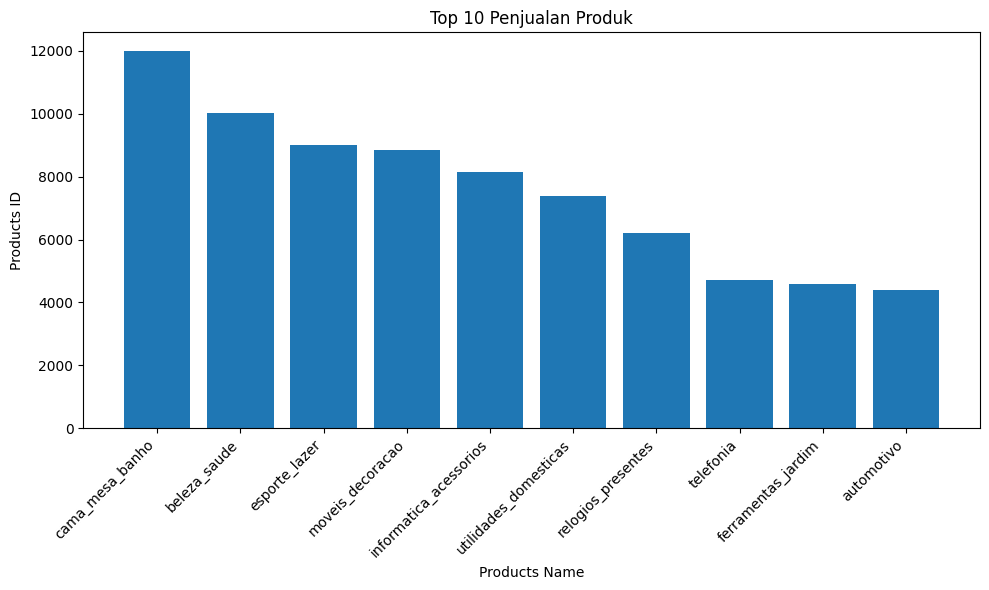

In [98]:
# Membuat visualisasi bar chart untuk menampilkan 10 produk terlaris

plt.figure(figsize=(10,6)) # Menentukan ukuran figure
plt.bar(totalPenjualan_df['Products Name'], totalPenjualan_df['Products ID']) # Membuat diagram batang

# Memberikan label pada sumbu x dan y
plt.xlabel('Products Name')
plt.ylabel('Products ID')

# Menambahkan judul pada grafik
plt.title('Top 10 Penjualan Produk')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menyesuaikan tata letak agar tampilan lebih rapi
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Insight :**
*   Kategori **"cama_mesa_banho"** merupakan produk dengan jumlah penjualan tertinggi, menunjukkan bahwa produk dalam kategori ini memiliki permintaan yang tinggi di pasar.
*   Di sisi lain, kategori **"automotivo"** memiliki jumlah penjualan yang lebih rendah dibandingkan kategori lainnya. Hal ini menunjukkan peluang untuk meningkatkan strategi pemasaran, promosi, atau diversifikasi produk dalam kategori ini guna menarik lebih banyak pelanggan.



###Pertanyaan 2: Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

Metode Pembayaran yang Paling Sering Digunakan:

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


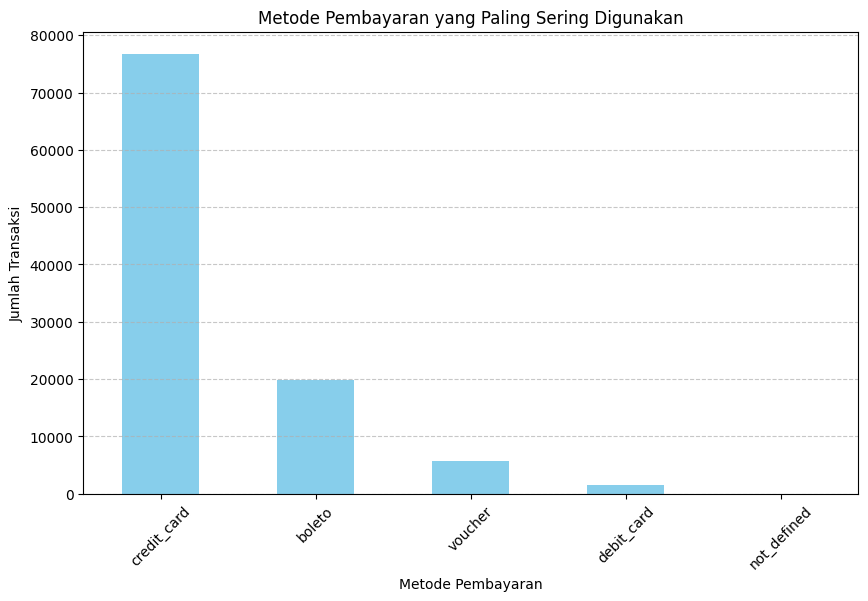

In [99]:
# Load dataset
file_path = "ecommerce_data/order_payments_dataset.csv"
df = pd.read_csv(file_path)

# Periksa apakah kolom 'payment_type' ada dalam dataset
if "payment_type" not in df.columns:
    print("Kolom 'payment_type' tidak ditemukan dalam dataset!")
else:
    # Hitung jumlah transaksi berdasarkan metode pembayaran
    payment_counts = df["payment_type"].value_counts()

    # Tampilkan hasil dalam bentuk tabel
    print("Metode Pembayaran yang Paling Sering Digunakan:\n")
    print(payment_counts)

    # Visualisasi metode pembayaran yang paling sering digunakan
    plt.figure(figsize=(10,6))
    payment_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Metode Pembayaran')
    plt.ylabel('Jumlah Transaksi')
    plt.title('Metode Pembayaran yang Paling Sering Digunakan')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**Insight:**

* Metode Pembayaran Dominan:
 * Kartu Kredit merupakan metode pembayaran yang paling sering digunakan dengan 76.795 transaksi.
 * Ini menunjukkan bahwa pelanggan e-commerce lebih memilih pembayaran dengan kartu kredit dibandingkan metode lain.

* Metode Pembayaran Alternatif:
 * Boleto (sistem pembayaran berbasis kode di Brasil) menempati posisi kedua dengan 19.784 transaksi.
 * Voucher digunakan sebanyak 5.775 kali, kemungkinan sebagai bagian dari program promosi atau diskon.

* Penggunaan Debit Card yang Rendah:
 * Metode debit card hanya digunakan dalam 1.529 transaksi, yang menunjukkan bahwa pelanggan lebih memilih kredit dibanding debit.
 * Hal ini bisa jadi karena keuntungan seperti cashback, cicilan tanpa bunga, atau program reward dari kartu kredit.

* Kategori 'Not Defined':
 * Ada 3 transaksi yang masuk dalam kategori "not_defined", yang mungkin merupakan data tidak lengkap atau transaksi yang gagal dicatat dengan benar.

### Pertanyaan 3: Dari kota atau negara bagian mana pesanan terbanyak berasal?

In [100]:
# Menghitung jumlah pesanan per kota
top_cities = allData['customer_city'].value_counts().reset_index()
top_cities.columns = ['customer_city', 'total_orders']
top_cities = top_cities.sort_values(by='total_orders', ascending=False).head(10)

# Menghitung jumlah pesanan per negara bagian
top_states = allData['customer_state'].value_counts().reset_index()
top_states.columns = ['customer_state', 'total_orders']
top_states = top_states.sort_values(by='total_orders', ascending=False).head(10)

# Menampilkan hasil
print("Top 10 Kota dengan Pesanan Terbanyak:")
print(top_cities)

print("\nTop 10 Negara Bagian dengan Pesanan Terbanyak:")
print(top_states)

Top 10 Kota dengan Pesanan Terbanyak:
           customer_city  total_orders
0              sao paulo         18875
1         rio de janeiro          8311
2         belo horizonte          3299
3               brasilia          2500
4               curitiba          1827
5               campinas          1757
6           porto alegre          1675
7               salvador          1544
8              guarulhos          1415
9  sao bernardo do campo          1131

Top 10 Negara Bagian dengan Pesanan Terbanyak:
  customer_state  total_orders
0             SP         50265
1             RJ         15518
2             MG         13819
3             RS          6573
4             PR          6043
5             SC          4345
6             BA          4091
7             DF          2516
8             GO          2466
9             ES          2360


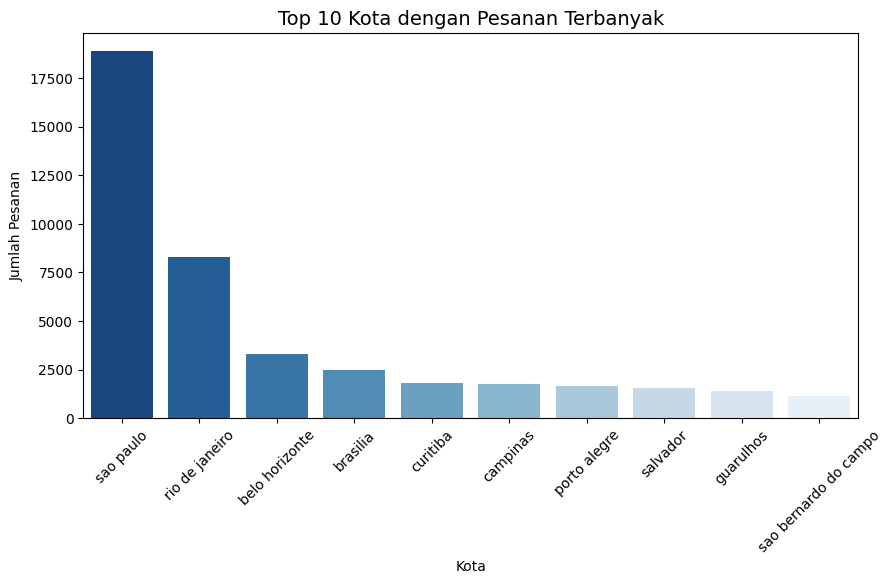

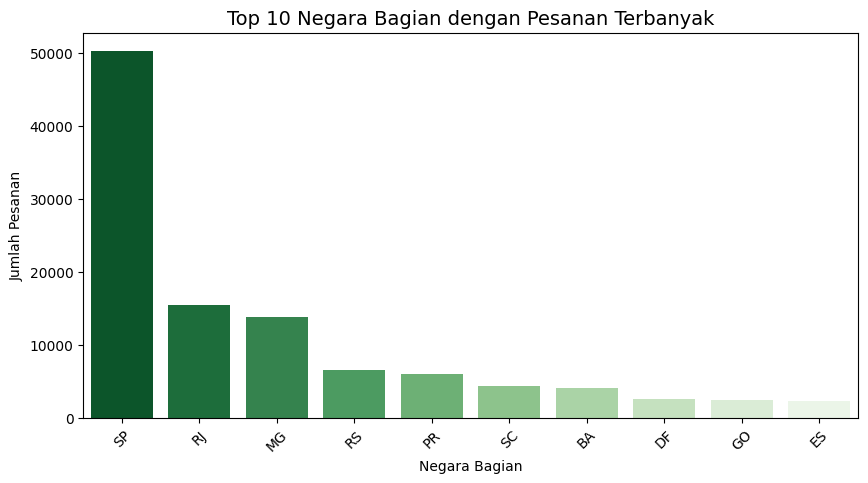

In [101]:
# Pastikan dataset sudah dimuat dan bernama allData
# Menghitung jumlah pesanan per kota
top_cities = allData['customer_city'].value_counts().head(10)

# Menghitung jumlah pesanan per negara bagian
top_states = allData['customer_state'].value_counts().head(10)

# Visualisasi pesanan berdasarkan kota
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    hue=top_cities.index,  # Menetapkan hue ke x agar kompatibel
    palette="Blues_r",
    legend=False  # Menonaktifkan legend yang tidak diperlukan
)
plt.title("Top 10 Kota dengan Pesanan Terbanyak", fontsize=14)
plt.xlabel("Kota")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

# Visualisasi pesanan berdasarkan negara bagian
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_states.index,
    y=top_states.values,
    hue=top_states.index,  # Menetapkan hue ke x agar kompatibel
    palette="Greens_r",
    legend=False  # Menonaktifkan legend yang tidak diperlukan
)
plt.title("Top 10 Negara Bagian dengan Pesanan Terbanyak", fontsize=14)
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()


**Insight:**
* Kota dengan Pesanan Terbanyak
 * Kota-kota besar mendominasi jumlah pesanan, terutama kota dengan populasi dan aktivitas ekonomi tinggi.
 * Kota São Paulo kemungkinan menjadi kota dengan pesanan terbanyak karena merupakan pusat bisnis dan ekonomi di Brasil.
 * Kota-kota besar lainnya seperti Rio de Janeiro, Belo Horizonte, dan Brasília juga memiliki jumlah pesanan tinggi, yang mencerminkan tingginya penetrasi e-commerce di daerah perkotaan.
 * Kota dengan jumlah pesanan lebih rendah mungkin memiliki akses yang lebih terbatas terhadap layanan logistik atau preferensi belanja yang lebih rendah secara online.

* Negara Bagian dengan Pesanan Terbanyak
 * Negara bagian São Paulo (SP) memiliki pesanan terbanyak, mencerminkan dominasi ekonomi dan populasi yang tinggi di wilayah ini.
 * Negara bagian lain seperti Minas Gerais (MG), Rio de Janeiro (RJ), dan Paraná (PR) juga memiliki jumlah pesanan tinggi karena memiliki kota-kota besar yang mendukung pertumbuhan e-commerce.
 * Negara bagian dengan jumlah pesanan lebih sedikit mungkin memiliki tantangan dalam infrastruktur logistik atau lebih sedikit pengguna e-commerce.

### Pertanyaan 4: Berapa rata-rata waktu pengiriman untuk setiap kategori produk?

In [120]:
import pandas as pd

# Mengonversi kolom waktu menjadi format datetime
allData['order_delivered_customer_date'] = pd.to_datetime(allData['order_delivered_customer_date'])
allData['order_purchase_timestamp'] = pd.to_datetime(allData['order_purchase_timestamp'])

# Menghitung waktu pengiriman dalam hari
allData['delivery_time'] = (allData['order_delivered_customer_date'] - allData['order_purchase_timestamp']).dt.days

# Menghitung rata-rata waktu pengiriman untuk setiap kategori produk
delivery_time_per_category = allData.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Mengurutkan berdasarkan waktu pengiriman tercepat
delivery_time_per_category = delivery_time_per_category.sort_values(by='delivery_time', ascending=True)

# Mengambil 10 kategori dengan waktu pengiriman tercepat
top_10_fastest = delivery_time_per_category.head(10)

# Menampilkan tabel
print(top_10_fastest.to_string(index=False))


                        product_category_name  delivery_time
                           artes_e_artesanato       5.291667
                                   la_cuisine       7.250000
portateis_cozinha_e_preparadores_de_alimentos       7.785714
                            livros_importados       7.847458
                fashion_roupa_infanto_juvenil       8.142857
                                     pc_gamer       8.555556
                            artigos_de_festas       8.644444
                                    alimentos       9.116505
            construcao_ferramentas_iluminacao       9.160772
                  portateis_casa_forno_e_cafe       9.360000


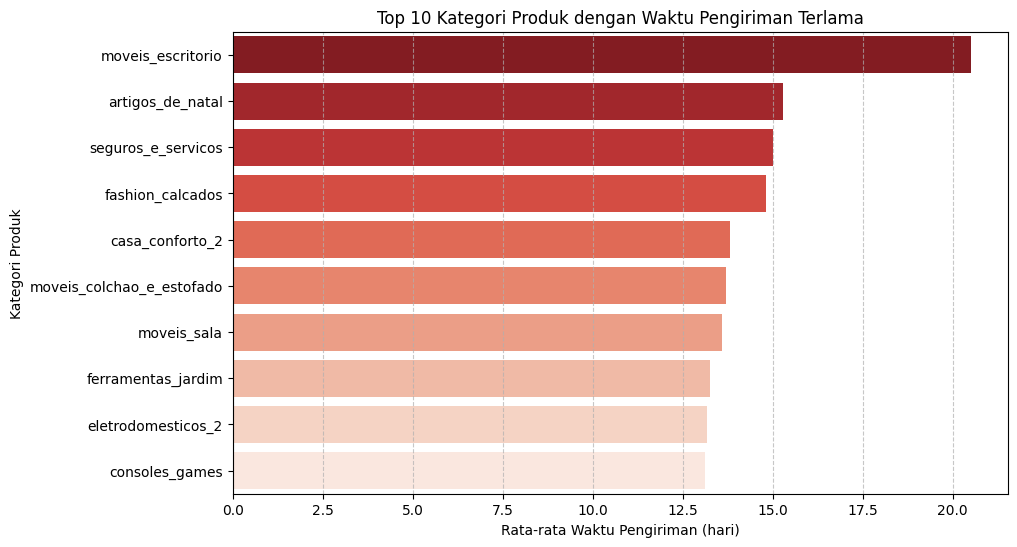

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil hanya 10 kategori dengan rata-rata waktu pengiriman tertinggi
top_10_categories = delivery_time_per_category.nlargest(10, 'delivery_time')

# Membuat ukuran figure
plt.figure(figsize=(10, 6))

# Membuat bar chart tanpa tumpukan label
sns.barplot(
    data=top_10_categories,
    x="delivery_time",
    y="product_category_name",
    hue="product_category_name",  # Menambahkan hue untuk menghindari warning
    dodge=False,
    legend=False,  # Menghilangkan legend agar tidak bertumpuk
    palette="Reds_r"
)

# Menambahkan label dan judul
plt.xlabel("Rata-rata Waktu Pengiriman (hari)")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk dengan Waktu Pengiriman Terlama")

# Menampilkan grid
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

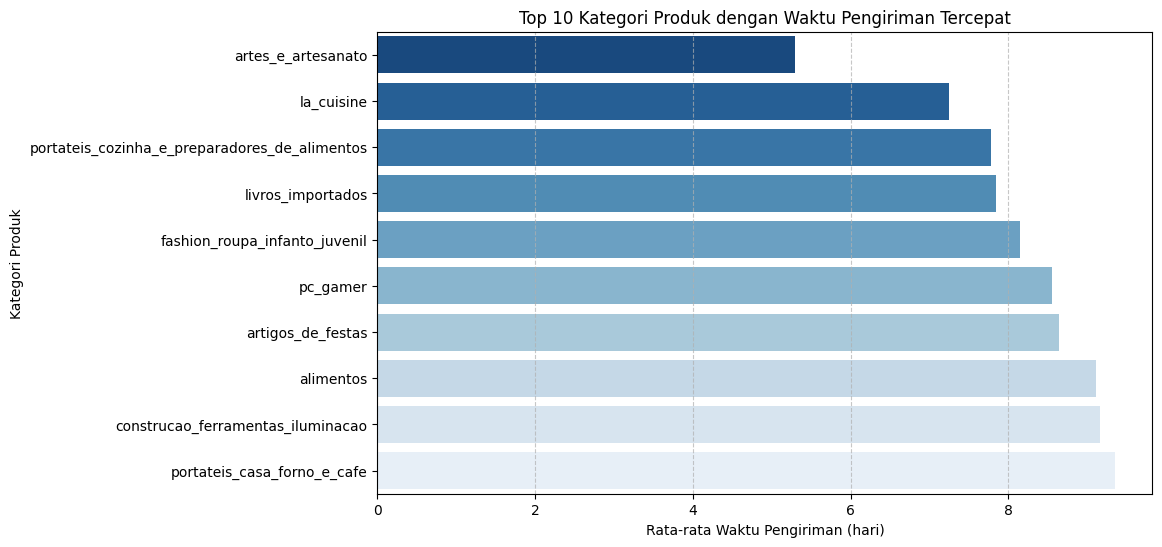

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 10 kategori dengan rata-rata waktu pengiriman tercepat
top_10_fastest = delivery_time_per_category.nsmallest(10, 'delivery_time')

# Membuat ukuran figure
plt.figure(figsize=(10, 6))

# Membuat bar chart dengan hue untuk menghindari warning
sns.barplot(
    data=top_10_fastest,
    x="delivery_time",
    y="product_category_name",
    hue="product_category_name",  # Menambahkan hue agar warna sesuai kategori
    dodge=False,
    legend=False,  # Menghilangkan legend agar tidak bertumpuk
    palette="Blues_r"  # Warna biru menunjukkan kecepatan
)

# Menambahkan label dan judul
plt.xlabel("Rata-rata Waktu Pengiriman (hari)")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk dengan Waktu Pengiriman Tercepat")

# Menampilkan grid
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
* Kategori dengan Pengiriman Tercepat
 * Produk seperti 'artes_e_artesanato' (5,3 hari) dan 'la_cuisine' (7,2 hari) cenderung memiliki waktu pengiriman lebih singkat,
 * kemungkinan karena stok yang tersedia secara lokal atau distribusi yang lebih efisien.

* Kategori dengan Pengiriman Terlama
 * 'moveis_escritorio' (20,5 hari), 'artigos_de_natal' (15,3 hari), dan 'seguros_e_servicos' (15 hari) mengalami waktu pengiriman paling lama.
 * Ini bisa disebabkan oleh ukuran besar, proses pengadaan yang kompleks, atau faktor logistik lainnya.

### Pertanyaan 5: Bagaimana tingkat kepuasan pelanggan? Produk mana yang memiliki ulasan rating tertinggi dan terendah dari pelanggan?

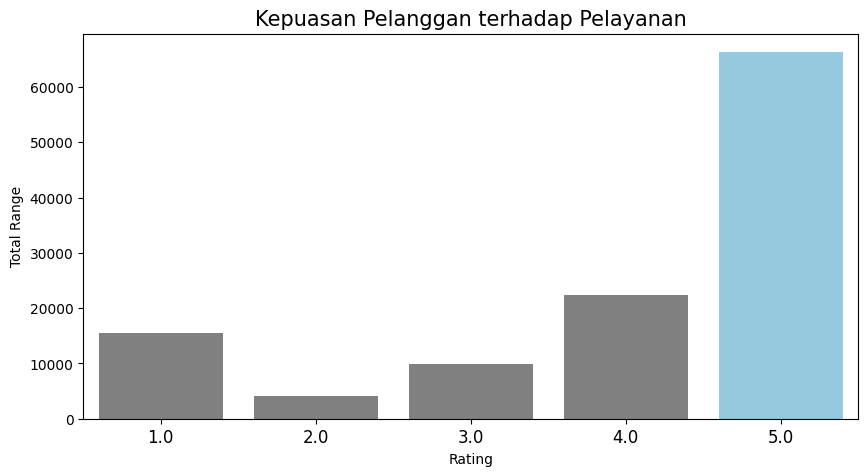

In [104]:
# Pastikan allData sudah didefinisikan
ratingScores = allData['review_score'].value_counts().sort_index()

# Menentukan skor yang paling umum
most_common_score = ratingScores.idxmax()

plt.figure(figsize=(10,5))
sns.barplot(
    x=ratingScores.index,
    y=ratingScores.values,
    hue=ratingScores.index,  # Menetapkan hue sesuai dengan x
    palette=["skyblue" if score == most_common_score else "grey" for score in ratingScores.index],
    legend=False  # Menonaktifkan legenda
)

# Menambahkan judul dan label pada grafik
plt.title("Kepuasan Pelanggan terhadap Pelayanan", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Total Range")
plt.xticks(fontsize=12)

# Menampilkan grafik
plt.show()

In [123]:
# Menghitung rata-rata skor ulasan (review_score) untuk setiap kategori produk
product_ratings = allData.groupby('product_category_name')['review_score'].mean().reset_index()

# Mengurutkan kategori produk berdasarkan rata-rata skor ulasan secara descending (tertinggi ke terendah)
sorted_products = product_ratings.sort_values(by='review_score', ascending=False)

# Mengambil produk dengan ulasan rating tertinggi
highest_rated_product = sorted_products.iloc[0]
print("Produk dengan Ulasan Rating Tertinggi:")
print(highest_rated_product)

# Mengambil produk dengan ulasan rating terendah
lowest_rated_product = sorted_products.iloc[-1]
print("\nProduk dengan Ulasan Rating Terendah:")
print(lowest_rated_product)

Produk dengan Ulasan Rating Tertinggi:
product_category_name    cds_dvds_musicais
review_score                      4.642857
Name: 17, dtype: object

Produk dengan Ulasan Rating Terendah:
product_category_name    seguros_e_servicos
review_score                            2.5
Name: 67, dtype: object


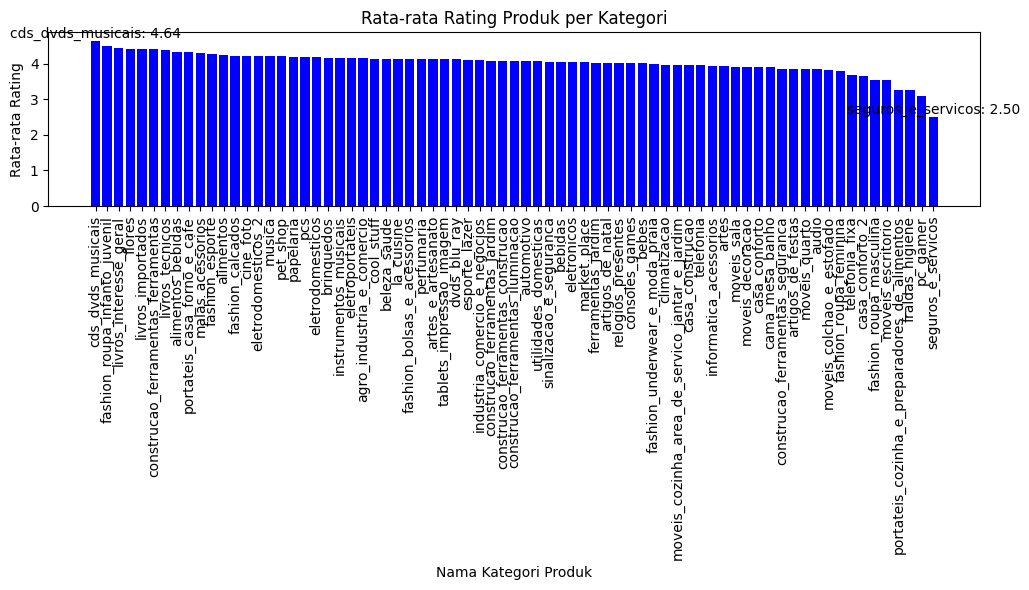

In [106]:
# Membuat visualisasi rata-rata rating produk per kategori menggunakan bar chart
plt.figure(figsize=(10, 6))

# Membuat diagram batang dengan warna biru untuk setiap kategori produk
plt.bar(sorted_products['product_category_name'], sorted_products['review_score'], color='blue')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Nama Kategori Produk')
plt.ylabel('Rata-rata Rating')
plt.title('Rata-rata Rating Produk per Kategori')

# Memutar label pada sumbu x agar lebih mudah dibaca
plt.xticks(rotation=90)

# Mengatur tata letak agar lebih rapi
plt.tight_layout()

# Menampilkan kategori produk dengan rating tertinggi di atas batangnya
plt.text(0, highest_rated_product['review_score'],
         f"{highest_rated_product['product_category_name']}: {highest_rated_product['review_score']:.2f}",
         ha='center', va='bottom')

# Menampilkan kategori produk dengan rating terendah di atas batangnya
plt.text(len(sorted_products)-1, lowest_rated_product['review_score'],
         f"{lowest_rated_product['product_category_name']}: {lowest_rated_product['review_score']:.2f}",
         ha='center', va='bottom')

# Menampilkan plot
plt.show()

**Insight:**


* Tingkat Kepuasan Pelanggan Secara Keseluruhan
 *   Sebagian besar pelanggan memberikan rating 5, menunjukkan bahwa mayoritas pelanggan merasa puas dengan produk dan layanan yang diberikan.
 * Rating lainnya seperti 4, 3, 2, dan 1 memiliki jumlah yang jauh lebih sedikit dibandingkan rating 5, menandakan bahwa keluhan pelanggan relatif kecil.

* Produk dengan Rating Tertinggi
 * Kategori produk "cds_dvds_musicais" memiliki rating tertinggi dengan rata-rata skor 4.64.
 * Hal ini menunjukkan bahwa produk dalam kategori ini memiliki kualitas yang baik atau memenuhi ekspektasi pelanggan.

* Produk dengan Rating Terendah
 * Kategori produk "seguros_e_servicos" memiliki rating terendah dengan rata-rata skor 2.5.
 * Hal ini mengindikasikan adanya masalah pada kualitas produk atau layanan yang perlu diperbaiki, seperti transparansi informasi, manfaat yang diberikan, atau layanan pelanggan.

### Pertanyaan 6: Bagaimana tren performa penjualan?

In [124]:
import pandas as pd

# Mengonversi kolom 'order_purchase_timestamp' ke format datetime
allData['order_purchase_timestamp'] = pd.to_datetime(allData['order_purchase_timestamp'])

# Menambahkan kolom 'bulan' untuk menyimpan periode bulan dan tahun dari tanggal transaksi
allData['bulan'] = allData['order_purchase_timestamp'].dt.to_period('M')

# Mengelompokkan data berdasarkan bulan dan menghitung total serta rata-rata harga penjualan per bulan
penjualan_per_bulan = allData.groupby('bulan')['price'].agg(Total_Penjualan='sum', Rata_Rata_Harga='mean').reset_index()

# Menampilkan hasil dalam bentuk tabel
print(penjualan_per_bulan.to_string(index=False))

  bulan  Total_Penjualan  Rata_Rata_Harga
2016-09           267.36        44.560000
2016-10         51068.92       132.646545
2016-12            10.90        10.900000
2017-01        129895.32       126.974897
2017-02        262013.86       126.393565
2017-03        398117.44       124.372833
2017-04        392595.36       137.079385
2017-05        549226.84       123.560594
2017-06        456867.47       119.536230
2017-07        536906.96       109.864326
2017-08        606026.98       116.008227
2017-09        665047.38       129.487418
2017-10        697457.32       124.169008
2017-11       1055072.10       115.992975
2017-12        773574.02       117.332629
2018-01        993701.49       115.506392
2018-02        889512.29       110.884105
2018-03       1029589.67       119.831200
2018-04       1031717.62       124.724084
2018-05       1032699.42       125.464636
2018-06        910053.03       123.046651
2018-07        927401.38       126.074141
2018-08        884731.52       118

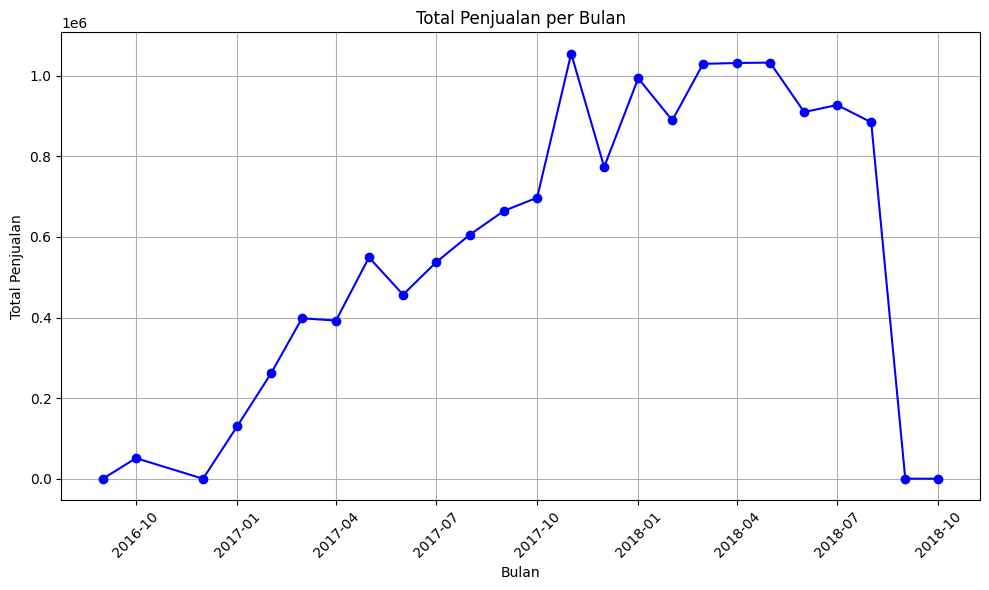

In [108]:
# Mengubah format periode bulan menjadi string dengan format "YYYY-MM-DD"
penjualan_per_bulan['bulan'] = penjualan_per_bulan['bulan'].astype(str) + '-01'

# Mengonversi kembali ke format datetime untuk memastikan dapat digunakan dalam visualisasi
penjualan_per_bulan['bulan'] = pd.to_datetime(penjualan_per_bulan['bulan'])

# Membuat visualisasi tren total penjualan per bulan
plt.figure(figsize=(10, 6))
plt.plot(penjualan_per_bulan['bulan'], penjualan_per_bulan['sum'], marker='o', color='b', linestyle='-')
plt.xlabel('Bulan')  # Label sumbu x
plt.ylabel('Total Penjualan')  # Label sumbu y
plt.title('Total Penjualan per Bulan')  # Judul grafik
plt.xticks(rotation=45)  # Memiringkan label sumbu x agar lebih mudah dibaca
plt.grid(True)  # Menampilkan garis grid untuk kemudahan membaca grafik
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong

# Menampilkan grafik
plt.show()

**Insight:**
* Tren Pertumbuhan Penjualan
 * 2016-09 hingga 2017-10: Penjualan menunjukkan tren meningkat secara konsisten.
 * Puncak Penjualan (2017-11): Terjadi lonjakan signifikan dengan total penjualan mencapai 1.05 juta.
 * 2018-01 hingga 2018-05: Penjualan tetap tinggi dan stabil di kisaran 990 ribu - 1.03 juta.
2 * 018-06 hingga 2018-08: Terjadi sedikit penurunan, namun masih dalam kisaran 880 ribu - 927 ribu.

* Penurunan Drastis di Akhir Periode
 * 2018-09: Penjualan anjlok drastis menjadi 145.00, jauh dari rata-rata bulan sebelumnya.
 * 2018-10: Penjualan mencapai 0, mengindikasikan kemungkinan penghentian operasional atau perubahan besar dalam bisnis.

* Rata-Rata Transaksi
 * Meskipun total penjualan meningkat hingga akhir 2017, rata-rata transaksi per pelanggan cenderung stabil di kisaran 115 - 137.
 * Setelah 2018-03, rata-rata transaksi mulai sedikit menurun.

## **Conclusion**

1. Produk apa saja yang paling banyak terjual? Top 10 sales
> Berdasarkan analisis penjualan, kategori "cama_mesa_banho" merupakan produk dengan jumlah penjualan tertinggi. Sebaliknya, kategori "automotivo" memiliki jumlah penjualan yang relatif rendah dan memerlukan strategi peningkatan penjualan.

2. Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
> Analisis menunjukkan bahwa kartu kredit adalah metode pembayaran paling dominan dalam e-commerce dengan 76.795 transaksi, diikuti oleh boleto (19.784) dan voucher (5.775), yang terkait dengan program promosi. Penggunaan debit card relatif rendah (1.529), karena keuntungan kartu kredit seperti cashback atau cicilan. Sementara itu, terdapat 3 transaksi tidak terdefinisi, yang disebabkan oleh data yang tidak lengkap atau kesalahan pencatatan.

3. Dari kota atau negara bagian mana pesanan terbanyak berasal?
> Kota São Paulo memiliki jumlah pesanan tertinggi, mencerminkan peranannya sebagai pusat bisnis dan ekonomi di Brasil, diikuti oleh Rio de Janeiro, Belo Horizonte, dan Brasília. Negara bagian São Paulo (SP) juga mendominasi pesanan, diikuti oleh Minas Gerais (MG), Rio de Janeiro (RJ), dan Paraná (PR). Daerah dengan pesanan lebih rendah cenderung memiliki infrastruktur logistik yang kurang mendukung atau tingkat adopsi e-commerce yang lebih rendah.

4. Berapa rata-rata waktu pengiriman untuk setiap kategori produk?
> Perbedaan waktu pengiriman dipengaruhi oleh ketersediaan stok, ukuran produk, dan kompleksitas logistik. Produk kecil dengan stok lokal seperti 'artes_e_artesanato' (5,3 hari) lebih cepat dikirim, sementara barang besar atau musiman seperti 'moveis_escritorio' (20,5 hari) butuh waktu lebih lama karena logistik kompleks.

5. Bagaimana tingkat kepuasan customer?   Produk mana yang memiliki rating tertinggi dan terendah?
> Sebagian besar produk mendapatkan rating 5, yang menunjukkan bahwa pelanggan secara umum cukup puas dengan layanan yang diberikan. Produk dengan rating tertinggi adalah "cds_dvds_musicais" dengan skor 4.64, sementara produk dengan rating terendah adalah "seguros_e_servicos" dengan skor 2.5.

6. Bagaimana performa penjualan sejauh ini?
> Tren penjualan menunjukkan peningkatan dari tahun 2016 hingga 2017, dengan pertumbuhan yang cukup signifikan. Namun, pada tahun 2018, penjualan mulai mengalami penurunan dan saat ini mencapai titik terendah. Hal ini menunjukkan perlunya strategi untuk meningkatkan kembali performa penjualan.



In [109]:
allData.to_csv("all_data.csv", index=False)

In [110]:
pip freeze > requirements.txt